In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
import pymannkendall as mk

# 00 settings

In [2]:
# path
res_path = 'D:/sorting/data/m005/'
print("res_path:", res_path)

# path
load_path = 'D:/sorting/data/m005/'
print("load_path:", res_path)

# parameters
duration = 10
calc_start, calc_end = 2250, 3750

bs_time_range = [2306, 2558, 2662, 2782, 2888, 2935, 3015, 3086, 3204, 3228, 3238, 3284, 3351, 3474]
ane_time_range = [2277, 2517, 2629, 2754, 2869, 2914,2998, 3066, 3190,3215, 3225, 3268, 3336, 3460]

bs_ane_time_range = bs_time_range + ane_time_range
bs_ane_time_range.sort()
print("bs_ane_time_range:", len(bs_ane_time_range))

bs_time_idx = []
for i in bs_time_range:
    bs_time_idx.append(bs_ane_time_range.index(i))
print("bs_time_idx:", len(bs_time_idx), bs_time_idx[:5])   

ane_time_idx = []
for i in ane_time_range:
    ane_time_idx.append(bs_ane_time_range.index(i))
print("ane_time_idx:", len(ane_time_idx), ane_time_idx[:5])   

res_path: D:/sorting/data/m005/
load_path: D:/sorting/data/m005/
bs_ane_time_range: 28
bs_time_idx: 14 [1, 3, 5, 7, 9]
ane_time_idx: 14 [0, 2, 4, 6, 8]


# 01 load data

denoised_data: (7338, 9429)


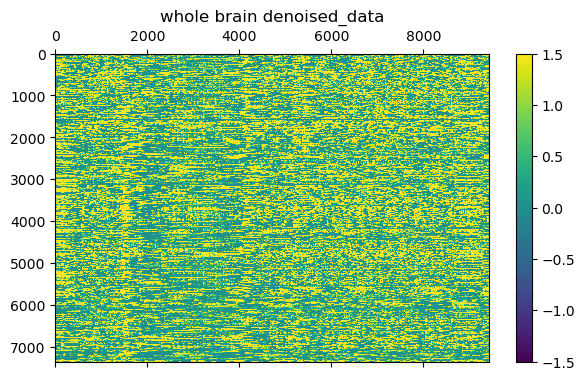

In [3]:
'''
calc data
'''
denoised_data = np.load(res_path + "neuron_denoised_records_whole_brain.npy")
print("denoised_data:", denoised_data.shape)

fig,ax = plt.subplots(figsize=(7,4), dpi=100,facecolor="w")
caxes = ax.matshow(denoised_data, vmin = -1.5, vmax = 1.5, cmap = "viridis", aspect = "auto")
fig.colorbar(caxes)
plt.title("whole brain denoised_data")
plt.show()

In [4]:
valid_neuron_x = pd.read_csv(load_path + "valid_neuron_x.csv")
print("valid_neuron_x:", type(valid_neuron_x), valid_neuron_x.shape)
valid_neuron_x = valid_neuron_x.values

valid_neuron_y = pd.read_csv(load_path + "valid_neuron_y.csv")
print("valid_neuron_y:", type(valid_neuron_y), valid_neuron_y.shape)
valid_neuron_y = valid_neuron_y.values


valid_neuron_x: <class 'pandas.core.frame.DataFrame'> (7338, 1)
valid_neuron_y: <class 'pandas.core.frame.DataFrame'> (7338, 1)


# 02 burst neurons

select_data_ids: 5716 <class 'numpy.ndarray'>


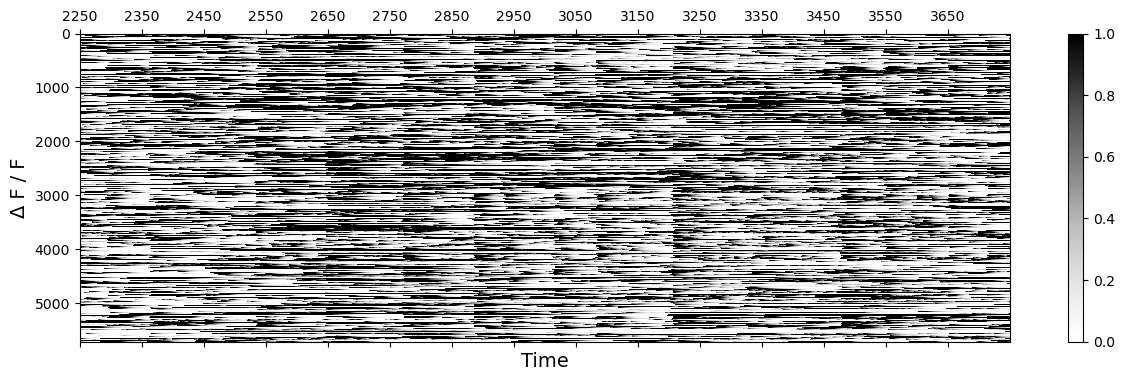

code_list: 5716
sort_id: 5716
sort_id: 5716
select_data_ids_sort: 5716
calc_rec: (5716, 1500)


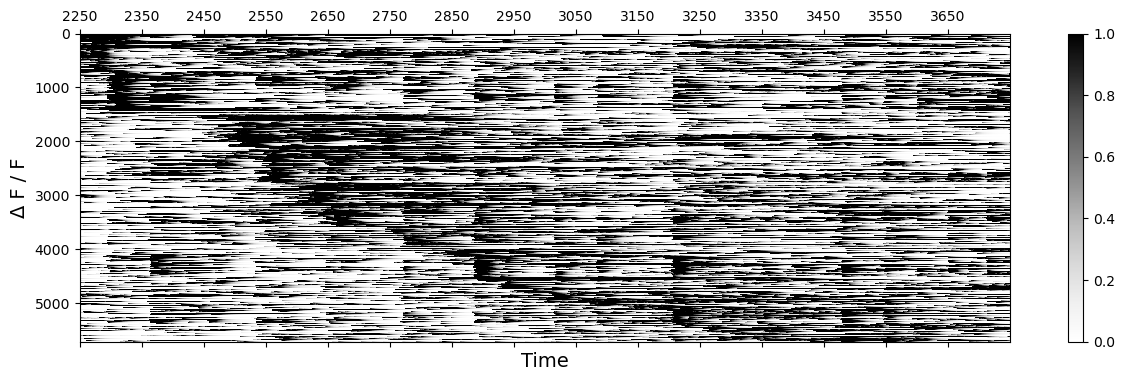

5716 28


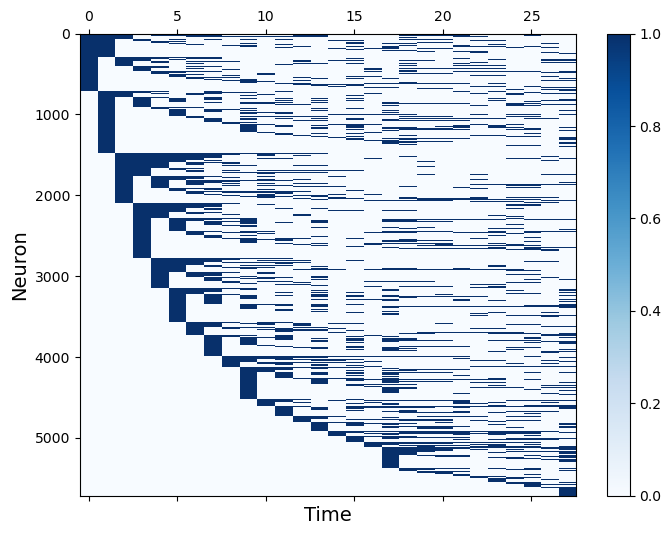

In [6]:
'''
burst neurons
'''
name = "burst"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort burst neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
'''
burst code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]
        
    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


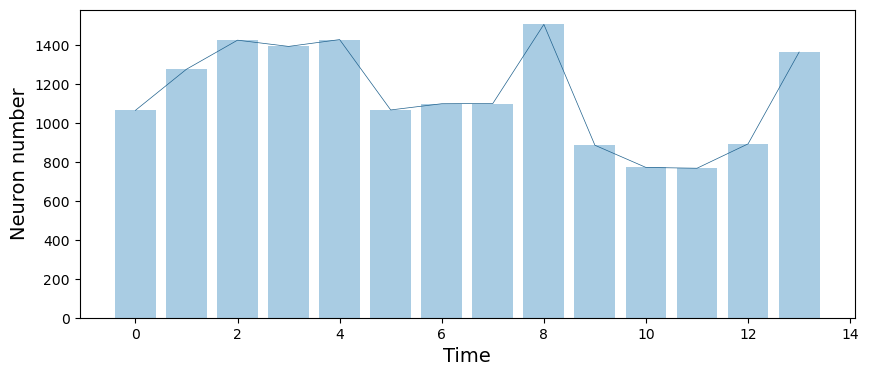

code_matrix_type_cnt length: 14
y: [0.10723060723060723, 0.1325026325026325, 0.1454896454896455, 0.13776763776763776, 0.12530712530712532, 0.10740610740610741, 0.08055458055458055, 0.05580905580905581, 0.040365040365040364, 0.02614952614952615, 0.018954018954018954, 0.01053001053001053, 0.008248508248508249, 0.0036855036855036856]


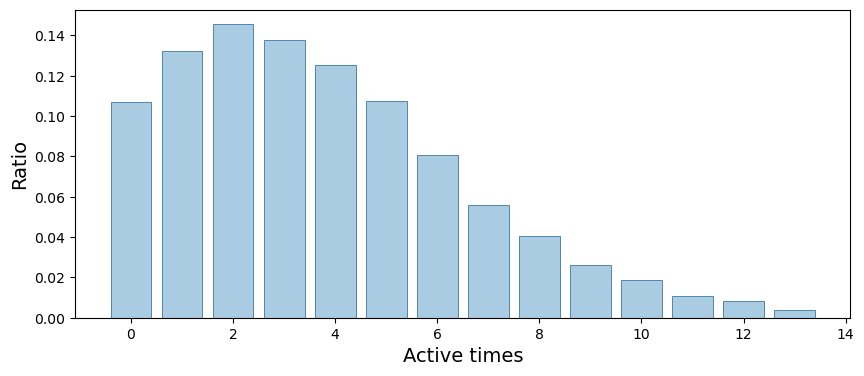

time 2306  -- selected neuron number: 1064


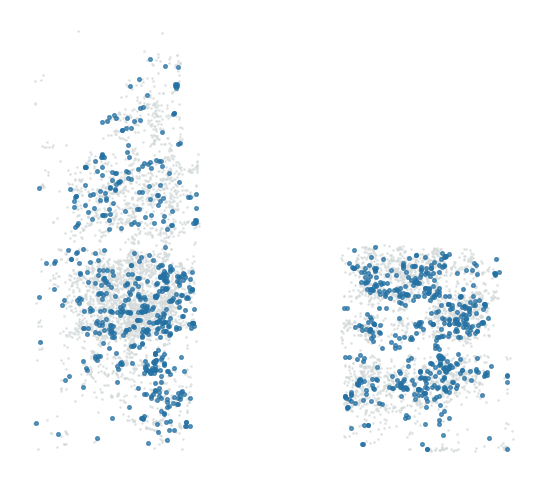

time 2558  -- selected neuron number: 1275


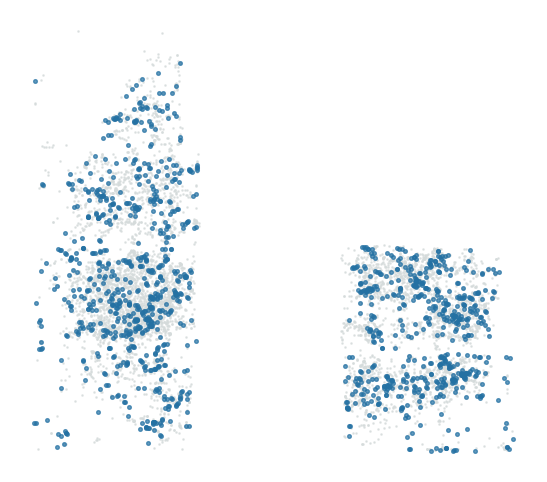

time 2662  -- selected neuron number: 1424


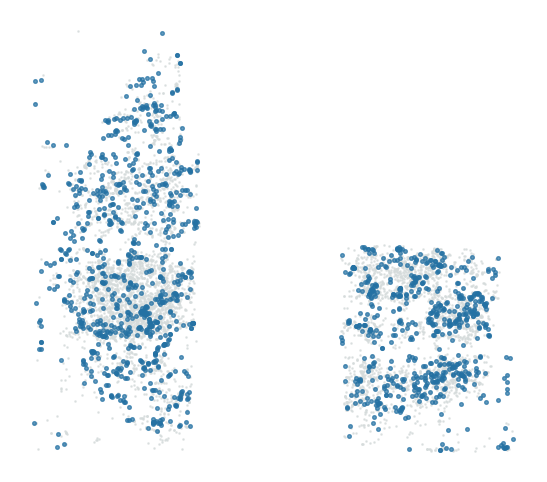

time 2782  -- selected neuron number: 1392


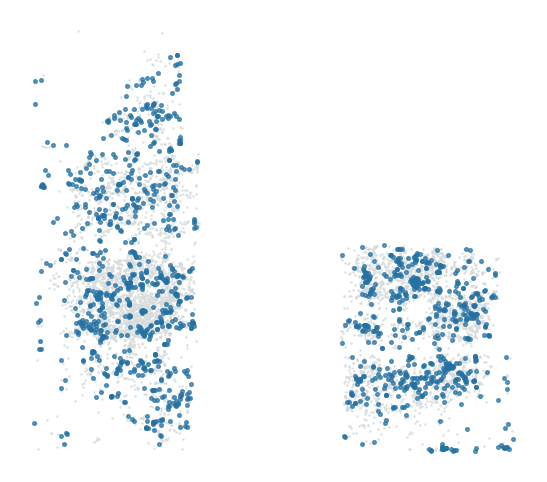

time 2888  -- selected neuron number: 1427


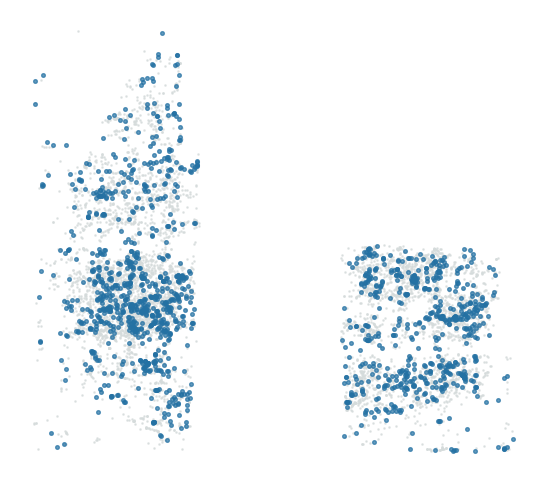

time 2935  -- selected neuron number: 1066


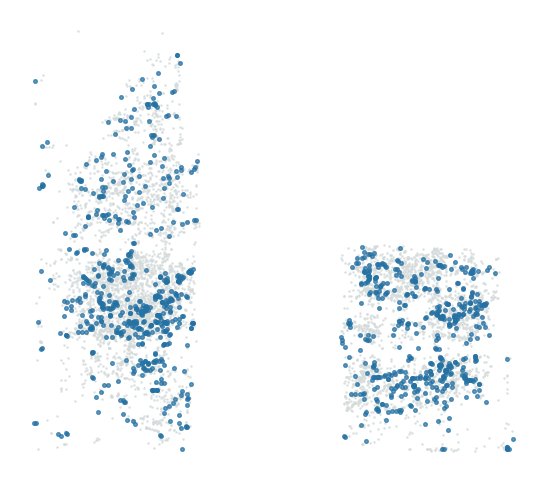

time 3015  -- selected neuron number: 1098


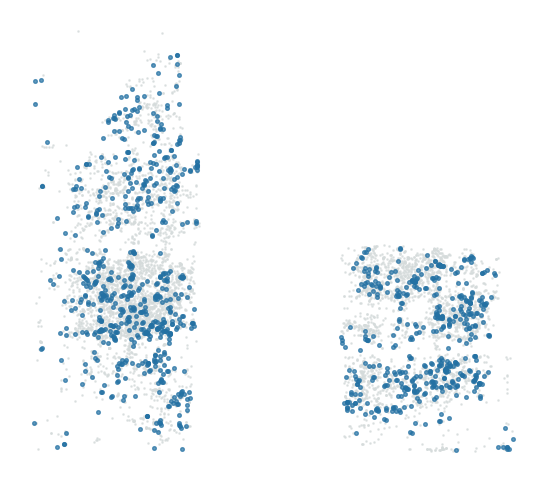

time 3086  -- selected neuron number: 1099


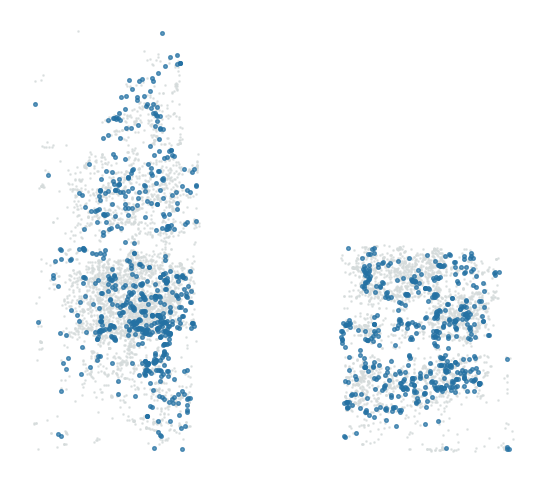

time 3204  -- selected neuron number: 1505


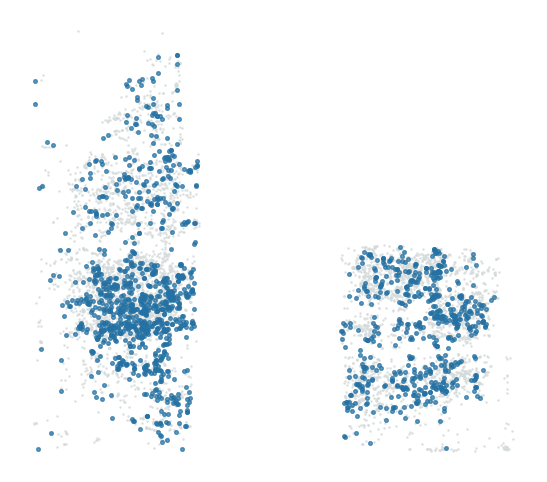

time 3228  -- selected neuron number: 885


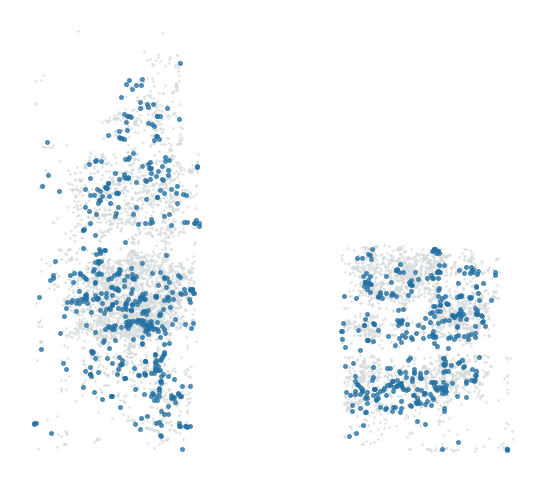

time 3238  -- selected neuron number: 771


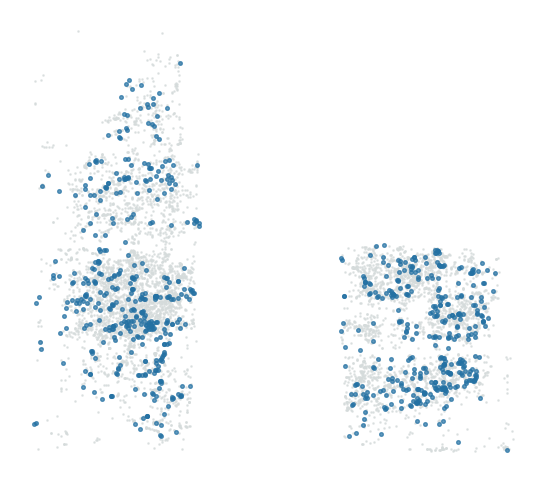

time 3284  -- selected neuron number: 767


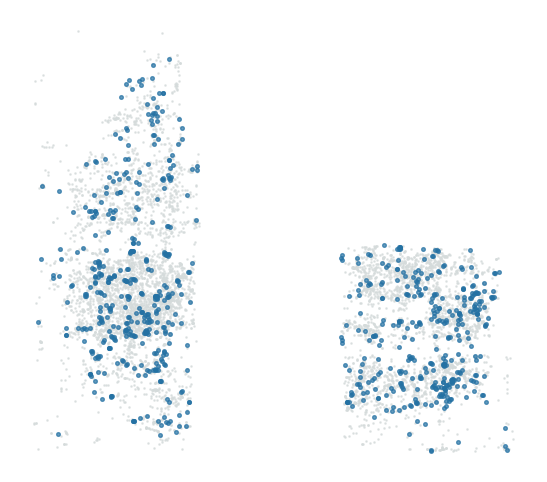

time 3351  -- selected neuron number: 892


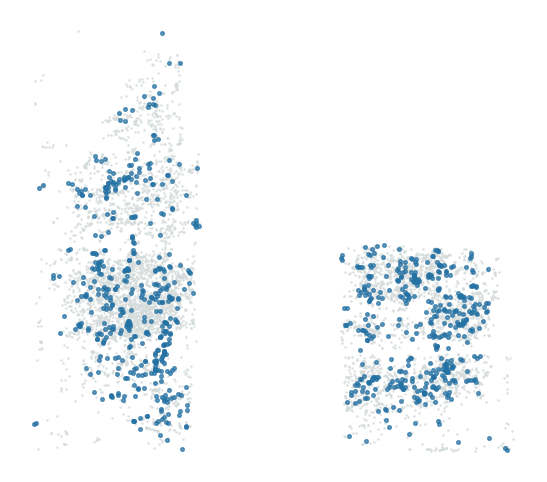

time 3474  -- selected neuron number: 1363


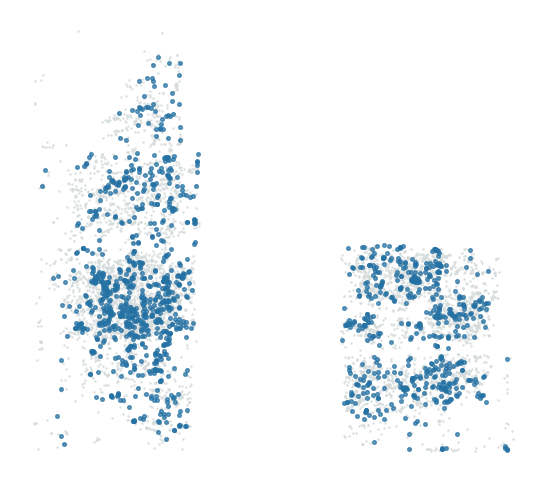

end


In [18]:
'''
statistics
'''

name = "burst"

## time evolution
bs_code_matrix_sum = np.sum(code_matrix, axis = 0)
bs_code_matrix_sum_bs = bs_code_matrix_sum[bs_time_idx]

x = range(len(bs_code_matrix_sum_bs))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, bs_code_matrix_sum_bs, color = "#A9CCE3")
plt.plot(bs_code_matrix_sum_bs, "-", color = "#1F618D", linewidth = 0.5)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Neuron number", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_" + name + ".pdf", bbox_inches='tight')
plt.show()


## active times
times_max = 14  ## change this parameter
code_matrix_type = np.sum(code_matrix, axis = 1)
code_matrix_type_cnt = []
for i in range(1, len(bs_code_matrix_sum_bs) + 1):
    cnt = list(code_matrix_type).count(i)
    code_matrix_type_cnt.append(cnt)

x = range(times_max)
print("code_matrix_type_cnt length:", len(code_matrix_type_cnt))
y = [code_matrix_type_cnt[i] / sum(code_matrix_type_cnt) for i in range(times_max - 1)]
y.append(sum(code_matrix_type_cnt[times_max - 1:]) / sum(code_matrix_type_cnt))
print("y:", y)

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, y, color = "#A9CCE3", edgecolor = "#1F618D", linewidth = 0.5)
plt.ylabel("Ratio", fontsize = 14)
plt.xlabel("Active times", fontsize = 14)
# plt.xlim((-0.05, 650))
plt.savefig(res_path + "neurons/neurons_active_code_ratio_" + name + "_selfAvg.pdf", bbox_inches='tight')
plt.show()


## brain map 
cnt = 0
cnt_list = []
for start in bs_time_range:   
    select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    print("time", start, " -- selected neuron number:", len(select_data_ids))

    ## pos
    neurons_x_only = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y_only = [valid_neuron_y[i] for i in select_data_ids]
    
    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x_only, neurons_y_only, s = 7, c = "#2471A3", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.png", bbox_inches='tight')
    plt.show()
    
print("end")

only_bs_ids: 1446
bs_and_ane_ids: 4270
------------------ only-type neurons ----------------------


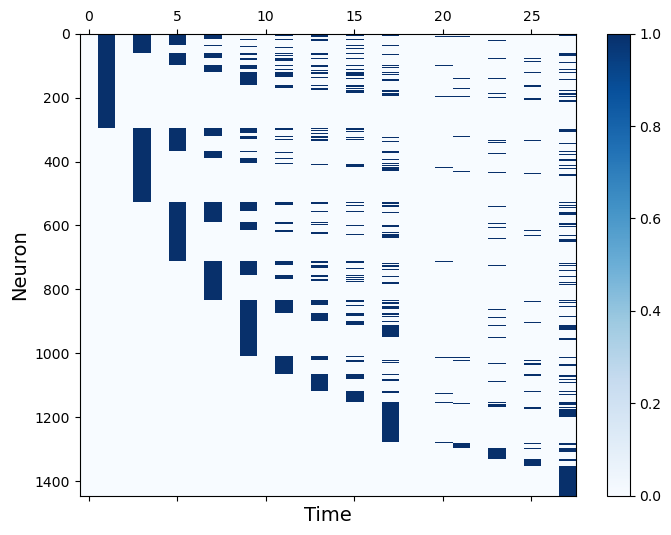

(1446,)


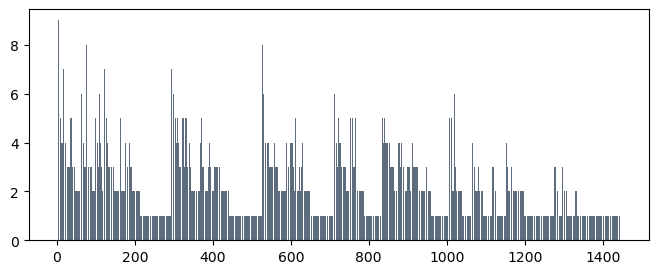

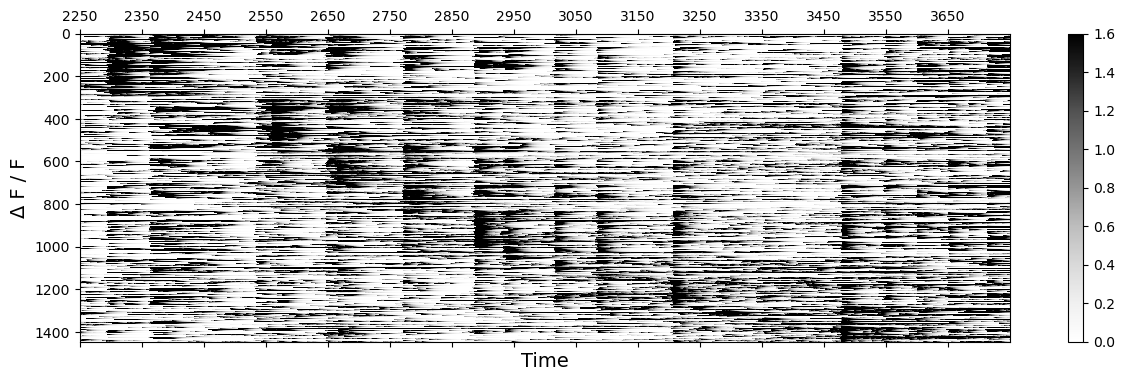

------------------ both-type neurons ----------------------


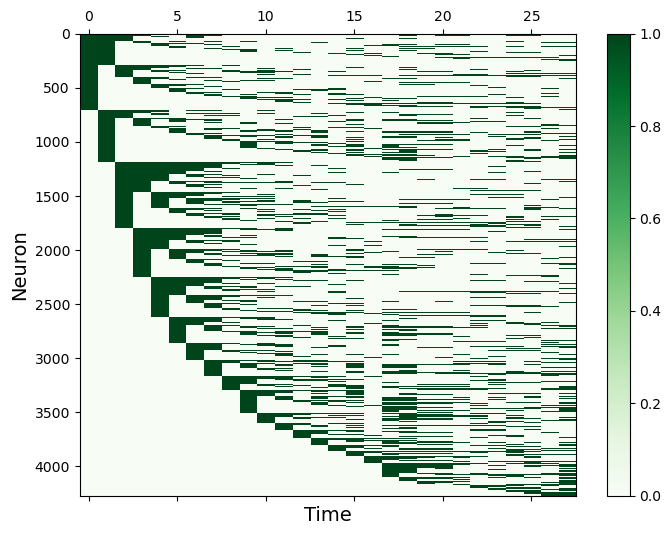

(4270,)


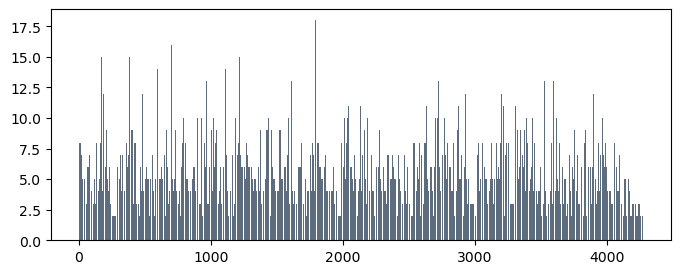

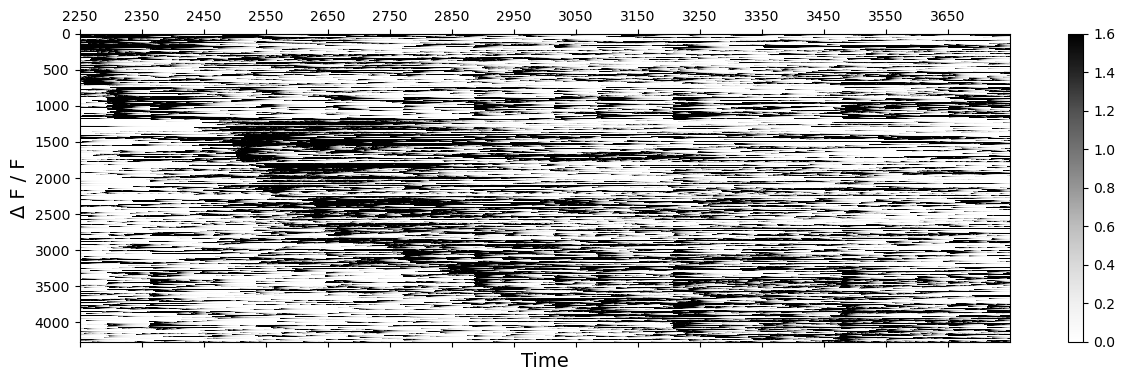

end


In [19]:
'''
detailed category
'''

name = "burst"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(bs_active_idx) == 0:
        continue
    if len(ane_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids)) 

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_only_bs = np.sum(code_matrix_only_bs, axis = 1)
print(code_matrix_sum_only_bs.shape)
x = range(len(code_matrix_sum_only_bs))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_only_bs,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_bs_ane = np.sum(code_matrix_bs_ane, axis = 1)
print(code_matrix_sum_bs_ane.shape)
x = range(len(code_matrix_sum_bs_ane))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_bs_ane,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


code_matrix_only_bs_sum_bs: (14,)


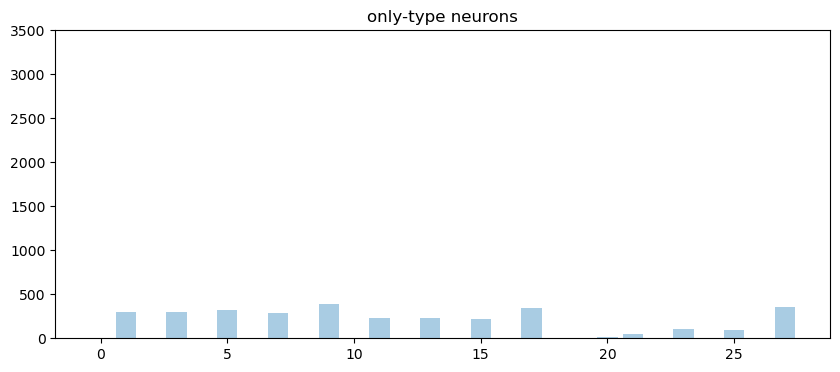

code_matrix_bs_ane_sum_bs_all: (28,)


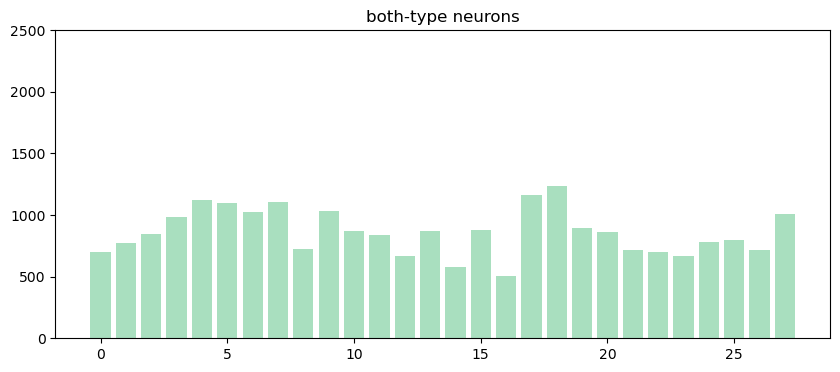

In [20]:
'''
further statistics
'''

## only-type neurons along time
code_matrix_only_bs_sum = np.sum(code_matrix_only_bs, axis = 0)
code_matrix_only_bs_sum_bs = code_matrix_only_bs_sum[bs_time_idx]
print("code_matrix_only_bs_sum_bs:", code_matrix_only_bs_sum_bs.shape)

data = [0] * len(bs_ane_time_range)
for i in range(len(bs_time_idx)):
    data[bs_time_idx[i]] = code_matrix_only_bs_sum_bs[i]
    
x = range(len(data))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, data, color = "#A9CCE3")#, edgecolor = "#2471A3")
plt.ylim((0,3500))
plt.title("only-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_burst.pdf", bbox_inches='tight')
plt.show()

## both-type neurons along time 
code_matrix_bs_ane_sum = np.sum(code_matrix_bs_ane, axis = 0)
code_matrix_bs_ane_sum_bs_all = code_matrix_bs_ane_sum
print("code_matrix_bs_ane_sum_bs_all:", code_matrix_bs_ane_sum_bs_all.shape)

x = range(len(code_matrix_bs_ane_sum_bs_all))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, code_matrix_bs_ane_sum_bs_all, color = "#A9DFBF")
plt.ylim((0,2500))
plt.title("both-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_both_burst_supp.pdf", bbox_inches='tight')
plt.show()



# 03 supp neurons

select_data_ids: 5071 <class 'numpy.ndarray'>


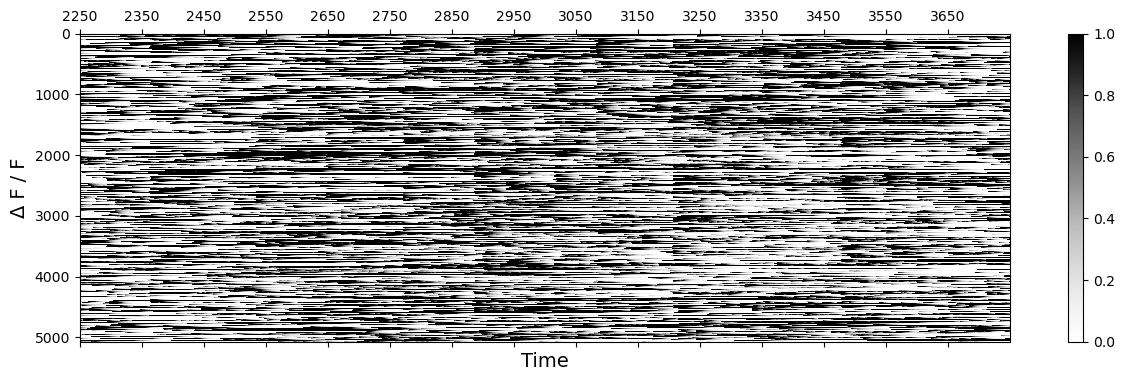

code_list: 5071
sort_id: 5071
sort_id: 5071
select_data_ids_sort: 5071
calc_rec: (5071, 1500)


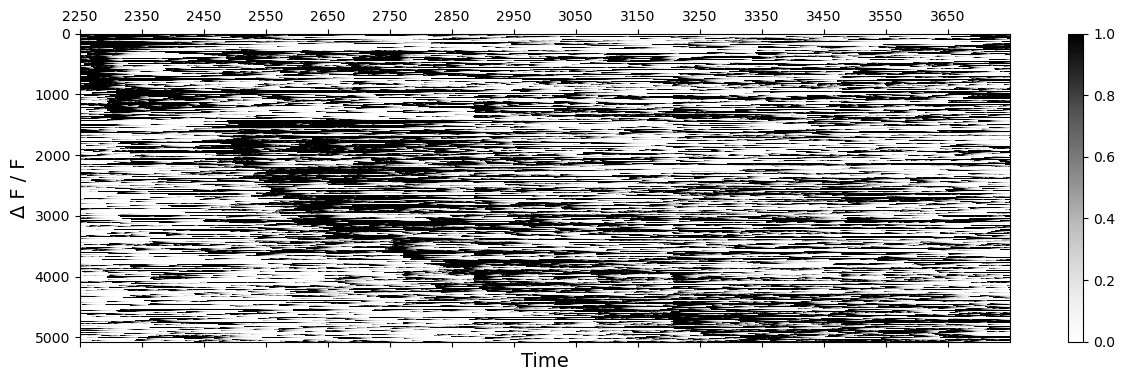

5071 28


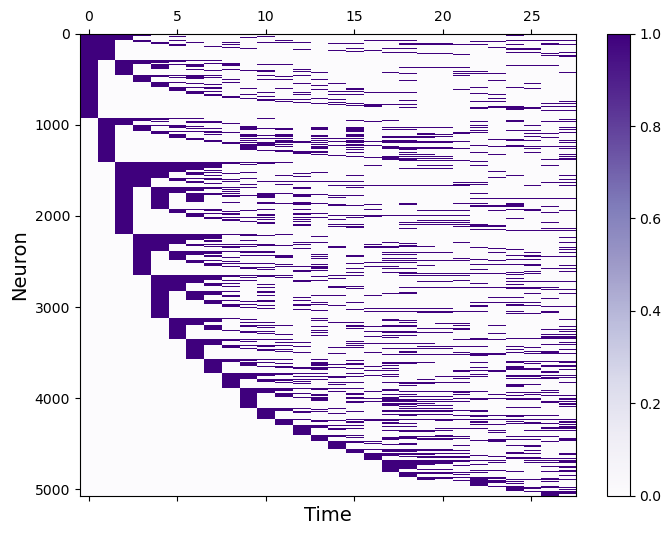

In [23]:
'''
supp neurons
'''
name = "supp"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort supp neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
    
'''
supp code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]

    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()



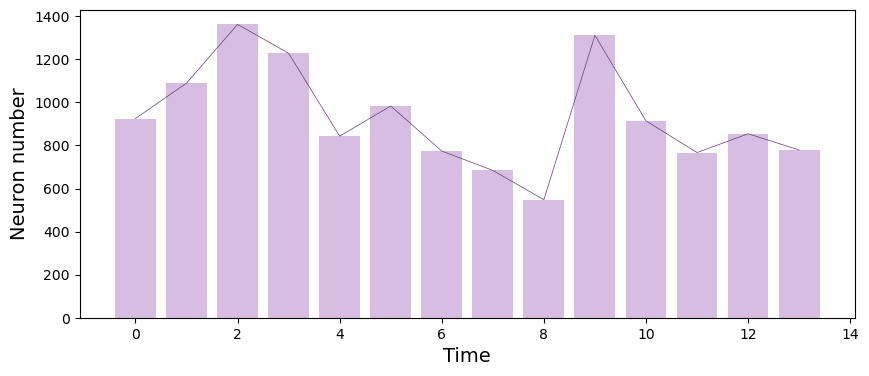

y: [0.06570354245002968, 0.11953295072234316, 0.15000989511181476, 0.14367702355036613, 0.13457352068078368, 0.11636651494161884, 0.08786859291509994, 0.061151791015238474, 0.04492380763902632, 0.02948743320799525, 0.021373441519889173, 0.011874134177716208, 0.009301405105877696, 0.004155946962200673]


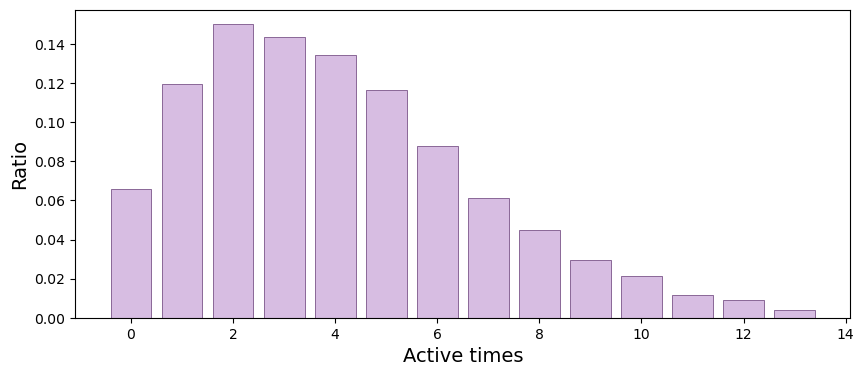

time 2277  -- selected neuron number: 925


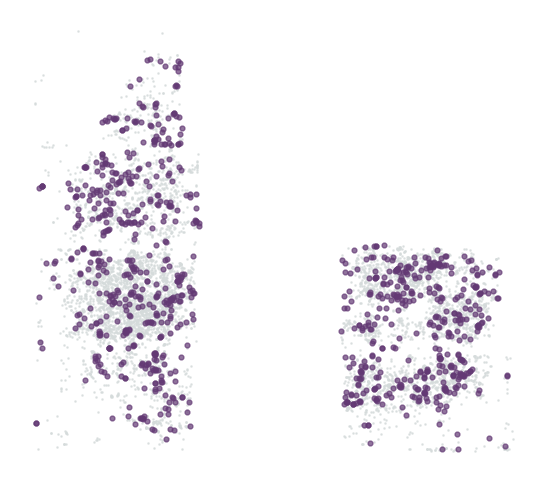

time 2517  -- selected neuron number: 1089


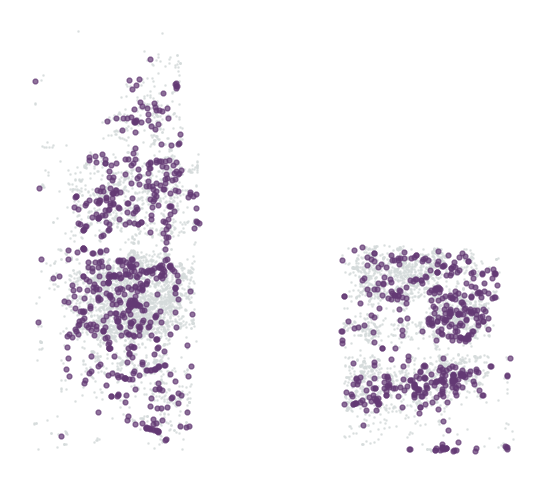

time 2629  -- selected neuron number: 1362


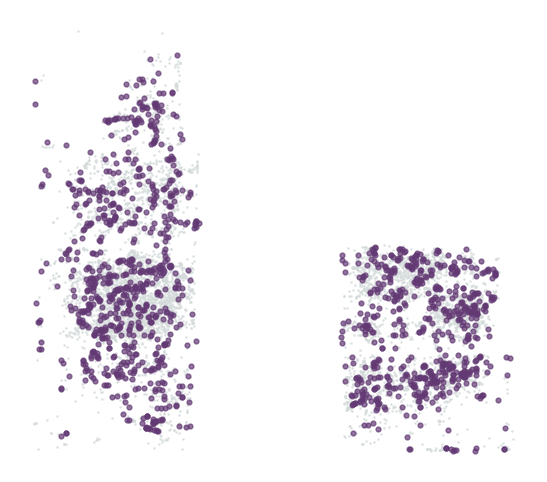

time 2754  -- selected neuron number: 1228


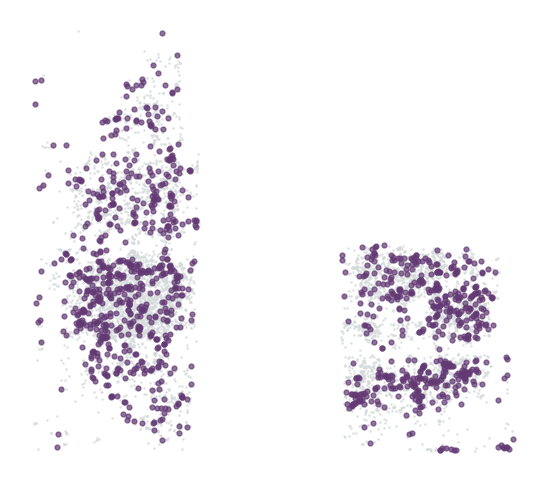

time 2869  -- selected neuron number: 843


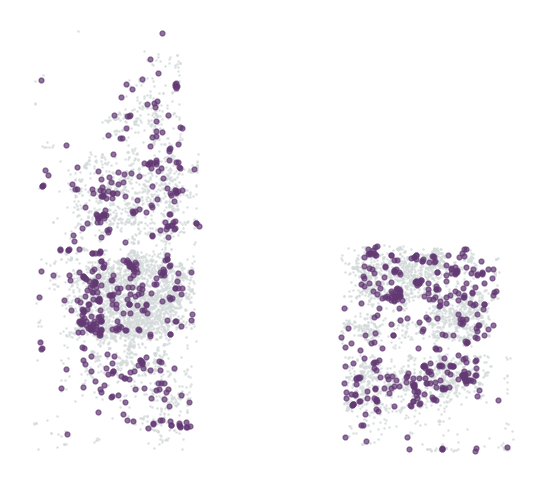

time 2914  -- selected neuron number: 983


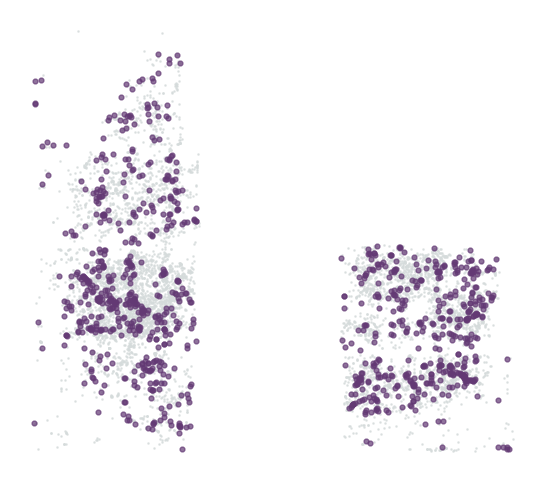

time 2998  -- selected neuron number: 774


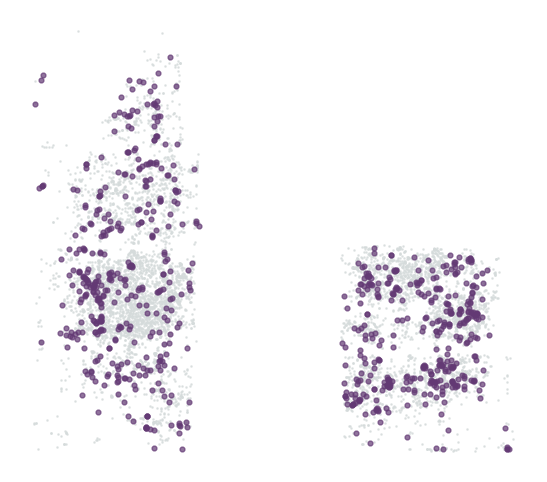

time 3066  -- selected neuron number: 684


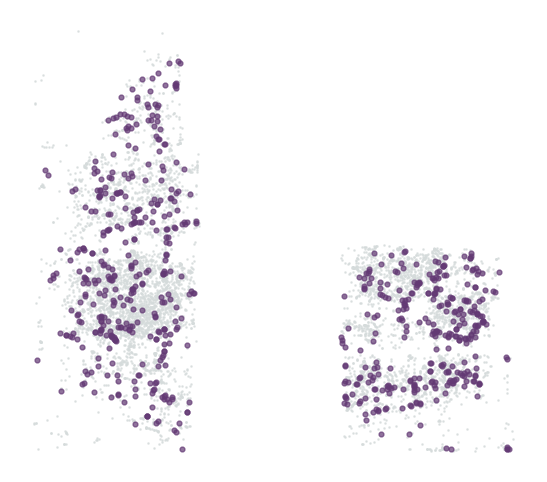

time 3190  -- selected neuron number: 548


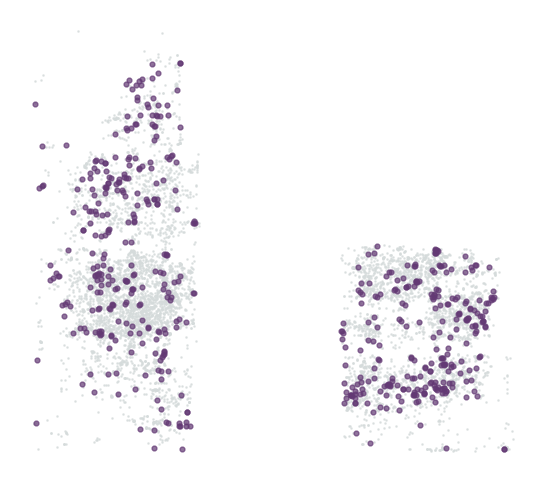

time 3215  -- selected neuron number: 1311


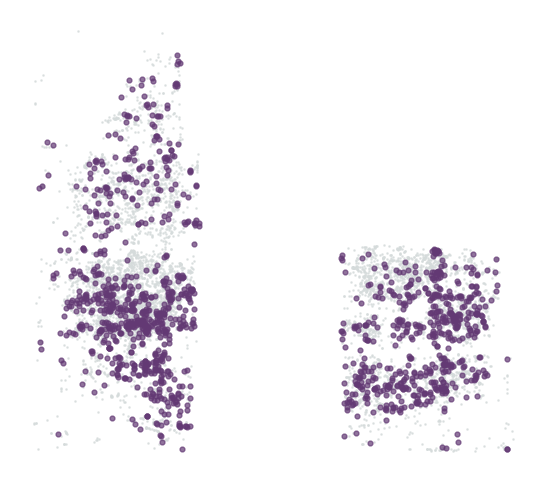

time 3225  -- selected neuron number: 914


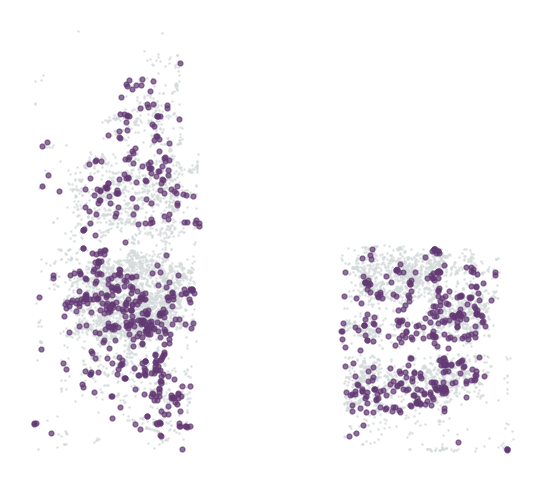

time 3268  -- selected neuron number: 767


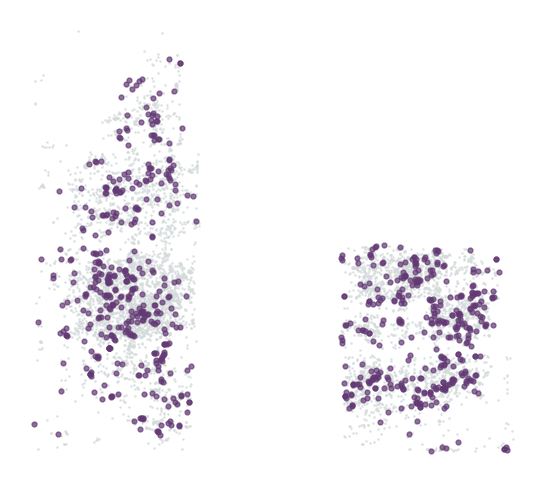

time 3336  -- selected neuron number: 854


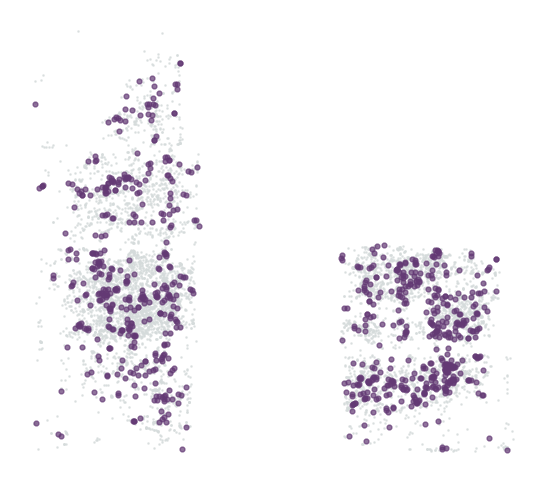

time 3460  -- selected neuron number: 779


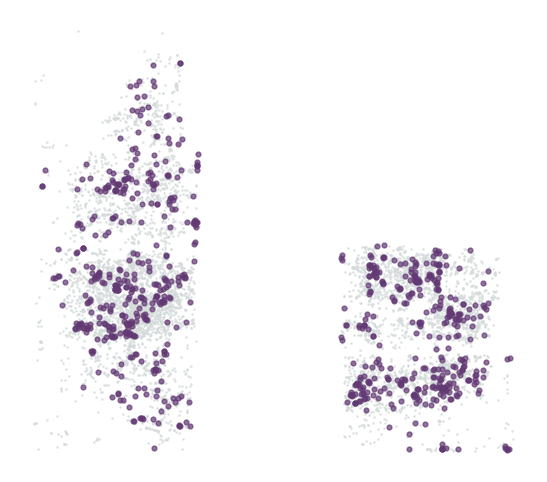

end


In [25]:
'''
statistics
'''

name = "supp"

## time evolution
bs_code_matrix_sum = np.sum(code_matrix, axis = 0)
bs_code_matrix_sum_bs = bs_code_matrix_sum[ane_time_idx]

x = range(len(bs_code_matrix_sum_bs))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, bs_code_matrix_sum_bs, color = "#D7BDE2")
plt.plot(bs_code_matrix_sum_bs, "-", color = "#633974", linewidth = 0.5)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Neuron number", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_" + name + ".pdf", bbox_inches='tight')
plt.show()


## active times
times_max = 14  ## change this parameter
code_matrix_type = np.sum(code_matrix, axis = 1)
code_matrix_type_cnt = []
for i in range(1, len(bs_code_matrix_sum_bs) + 1):
    cnt = list(code_matrix_type).count(i)
    code_matrix_type_cnt.append(cnt)

x = range(times_max)
y = [code_matrix_type_cnt[i] / sum(code_matrix_type_cnt) for i in range(times_max - 1)]
y.append(sum(code_matrix_type_cnt[times_max - 1:]) / sum(code_matrix_type_cnt))
print("y:", y)

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, y, color = "#D7BDE2", edgecolor = "#633974", linewidth = 0.5)
plt.ylabel("Ratio", fontsize = 14)
plt.xlabel("Active times", fontsize = 14)
# plt.xlim((-0.05, 650))
plt.savefig(res_path + "neurons/neurons_active_code_ratio_" + name + "_selfAvg.pdf", bbox_inches='tight')
plt.show()


## brain map 
cnt = 0
cnt_list = []
for start in ane_time_range:   
    select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    print("time", start, " -- selected neuron number:", len(select_data_ids))

    ## pos
    neurons_x_only = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y_only = [valid_neuron_y[i] for i in select_data_ids]
    
    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x_only, neurons_y_only, s = 12, c = "#633974", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.png", bbox_inches='tight')
    plt.show()
    
print("end")

only_bs_ids: 801
bs_and_ane_ids: 4270
------------------ only-type neurons ----------------------


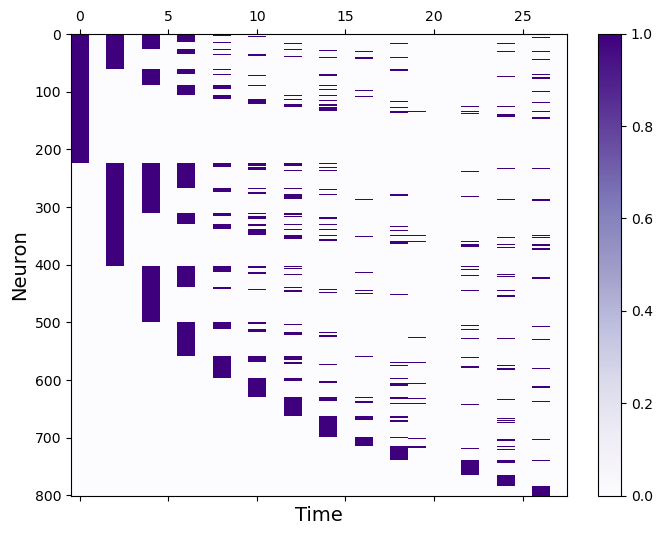

(801,)


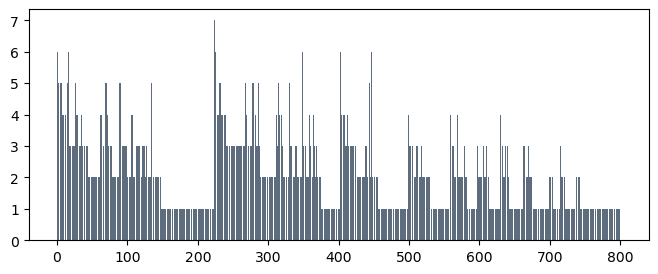

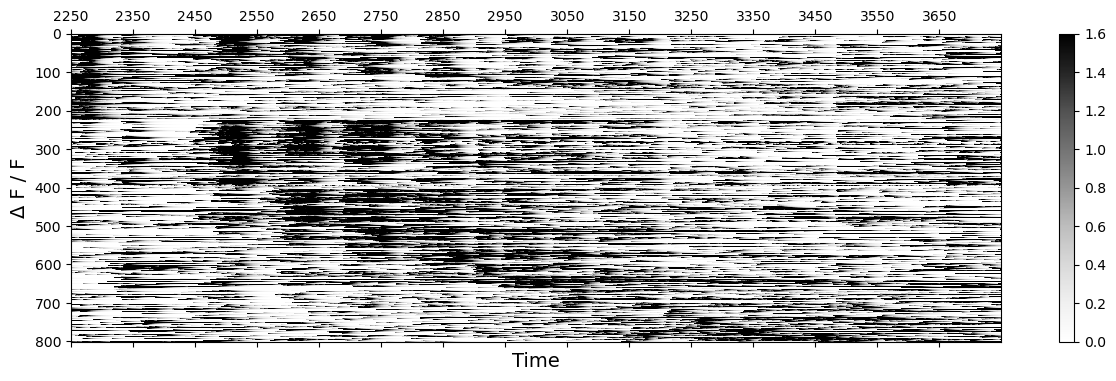

------------------ both-type neurons ----------------------


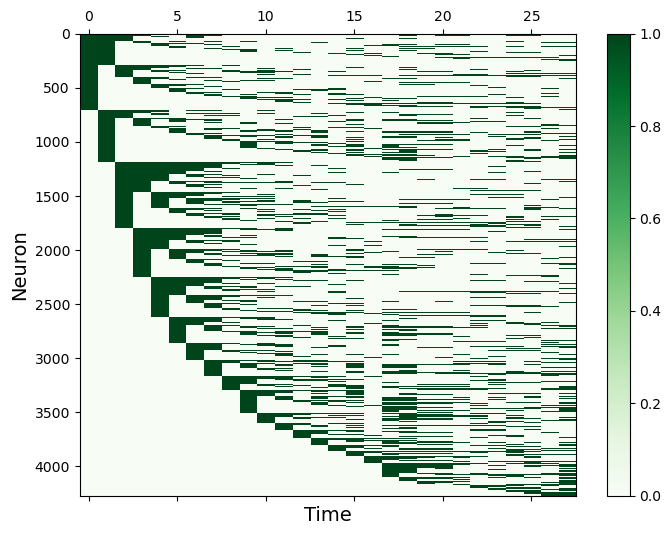

(4270,)


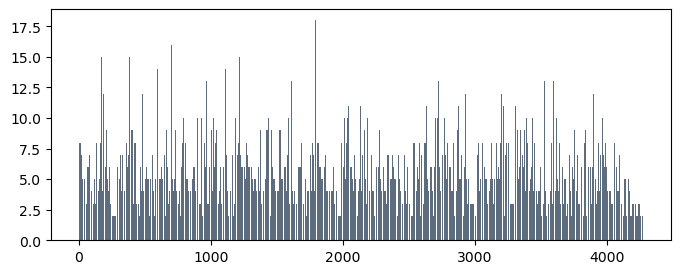

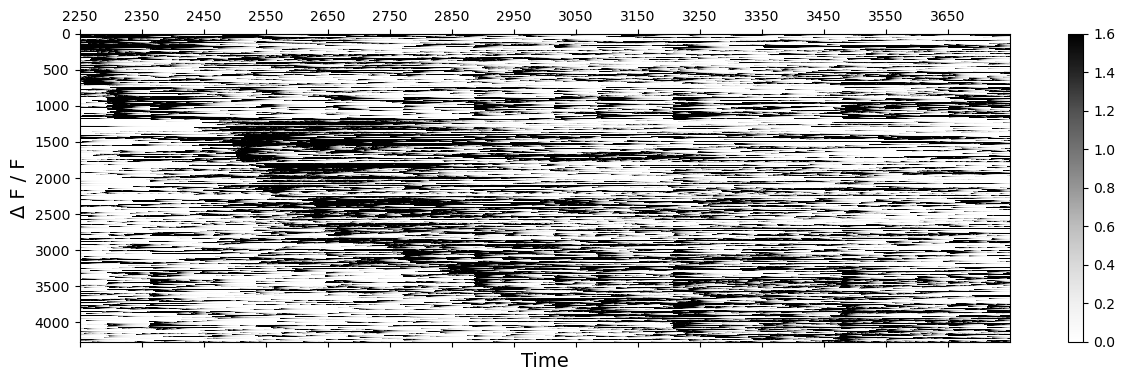

end


In [26]:
'''
detailed category
'''

name = "supp"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(ane_active_idx) == 0:
        continue
    if len(bs_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids))  

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_only_bs = np.sum(code_matrix_only_bs, axis = 1)
print(code_matrix_sum_only_bs.shape)
x = range(len(code_matrix_sum_only_bs))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_only_bs,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_bs_ane = np.sum(code_matrix_bs_ane, axis = 1)
print(code_matrix_sum_bs_ane.shape)
x = range(len(code_matrix_sum_bs_ane))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_bs_ane,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


code_matrix_only_bs_sum_bs: (14,)


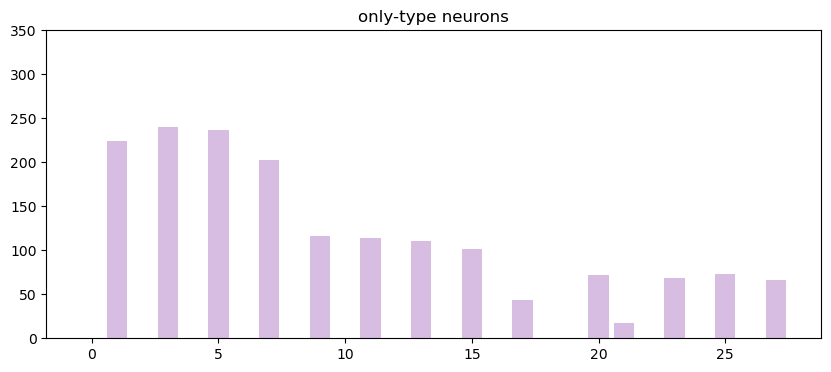

code_matrix_bs_ane_sum_bs_all: (28,)


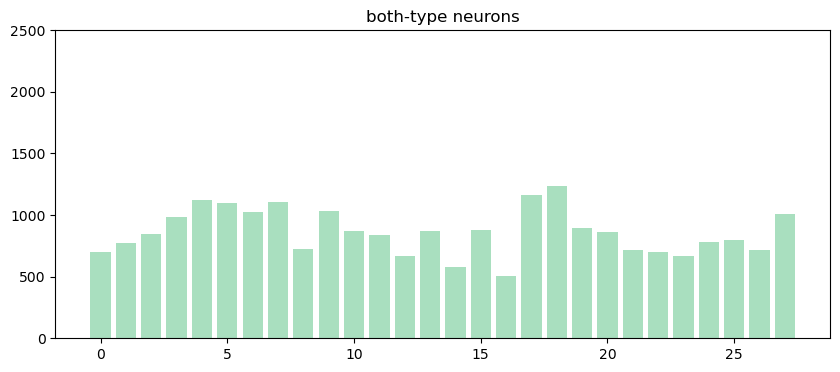

In [27]:
'''
further statistics
'''

## only-type neurons along time
code_matrix_only_bs_sum = np.sum(code_matrix_only_bs, axis = 0)
code_matrix_only_bs_sum_bs = code_matrix_only_bs_sum[ane_time_idx]
print("code_matrix_only_bs_sum_bs:", code_matrix_only_bs_sum_bs.shape)

data = [0] * len(bs_ane_time_range)
for i in range(len(ane_time_idx)):
    data[bs_time_idx[i]] = code_matrix_only_bs_sum_bs[i]
    
x = range(len(data))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, data, color = "#D7BDE2")#, edgecolor = "#2471A3")
plt.ylim((0,350))
plt.title("only-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_supp.pdf", bbox_inches='tight')
plt.show()

## both-type neurons along time 
code_matrix_bs_ane_sum = np.sum(code_matrix_bs_ane, axis = 0)
code_matrix_bs_ane_sum_bs_all = code_matrix_bs_ane_sum
print("code_matrix_bs_ane_sum_bs_all:", code_matrix_bs_ane_sum_bs_all.shape)

x = range(len(code_matrix_bs_ane_sum_bs_all))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, code_matrix_bs_ane_sum_bs_all, color = "#A9DFBF")#, edgecolor = "#2471A3")
plt.ylim((0,2500))
plt.title("both-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

